
## How to Use the Notebooks

To run these notebooks, follow these steps:


### 1. Install **`gdal`** Package
Installing `gdal` via `pip` may fail. Therefore, we recommend using conda to install it:
```bash
conda install gdal -c conda-forge
```

### 2. Install **`polsartools`** Package

Before running the notebooks, you'll need to install the core **`polsartools`** package. 

**Option A:** Install from PyPI `pip` (stable release)

```bash
pip install polsartools
```

**Option B:** Install from conda (stable release)

```bash
conda install polsartools -c bnarayanarao
```


**Option C:**  Install the latest version from GitHub (if you need recent updates or fixes)

```bash
pip install git+https://github.com/Narayana-Rao/polsartools.git#egg=polsartools
```
> **Note:** If you encounter a `"module not found"` error or require newer features, prefer the [GitHub installation](https://github.com/Narayana-Rao/polsartools).

### 3. Verify the Installation

After successfully installing `polsartools`, you can verify it by importing the package:

```bash
import polsartools as pst
```

If this runs without errors, you're ready to explore and run the notebooks.




In [1]:
""" import required packages"""

import polsartools as pst
import os
import matplotlib.pyplot as plt
import numpy as np

def read_rst(file):
    """ 
    Function to read a geotiff to a numpy array
    
    """
    ds = gdal.Open(file)
    band = ds.GetRasterBand(1)
    arr = band.ReadAsArray()
    arr[arr==0] = np.nan
    return arr
    

#### 1. Extract multilooked C2 matrix from ALOS-2 FBD data
##### using **`polsartools.alos2_fbd_l11`** function, [click here for documentation](https://polsartools.readthedocs.io/en/latest/files/sensors/alos2.html#fbd-l1-1-alos2-fbd-l11c) or run `print(polsartools.alos2_fbd_l11.__.doc__)`


In [6]:
inFolder =r"ALOS2214806690-180515"


# The following function extracts a multilooked C2 matrix from ALOS-2 FBD data. 
# Provide path to the extracted folder

pst.alos2_fbd_l11(inFolder,azlks=8,rglks=4)

Saved file ALOS2214806690-180515\ALOS2214806690-180515-FBDR\C2/C11.bin
Saved file ALOS2214806690-180515\ALOS2214806690-180515-FBDR\C2/C22.bin
Saved file ALOS2214806690-180515\ALOS2214806690-180515-FBDR\C2/C12_real.bin
Saved file ALOS2214806690-180515\ALOS2214806690-180515-FBDR\C2/C12_imag.bin
Execution time for alos2_fbd_l11: 11.00 seconds


#### 2. Speckle filtering using polarimetric refined-Lee filter (optional)

In [7]:
c2Folder = r'ALOS2214806690-180515\ALOS2214806690-180515-FBDR\C2/'
window_size = 3
pst.rlee(c2Folder,window_size=window_size)

Progress : 100%|███████████████████████████████████████████████████████████████████| 30/30 [00:04<00:00,  7.42 block/s]


Saved file ALOS2214806690-180515\ALOS2214806690-180515-FBDR\C2_rlee_3x3\C11.bin
Saved file ALOS2214806690-180515\ALOS2214806690-180515-FBDR\C2_rlee_3x3\C12_real.bin
Saved file ALOS2214806690-180515\ALOS2214806690-180515-FBDR\C2_rlee_3x3\C12_imag.bin
Saved file ALOS2214806690-180515\ALOS2214806690-180515-FBDR\C2_rlee_3x3\C22.bin
Execution time for rlee: 6.00 seconds


#### 3. Generate a quick look RGB from C2 matrix (optional)

RGB image saved as ALOS2214806690-180515\ALOS2214806690-180515-FBDR\C2_rlee_3x3\RGB4.png
Execution time for dxpRGB: 1.00 seconds


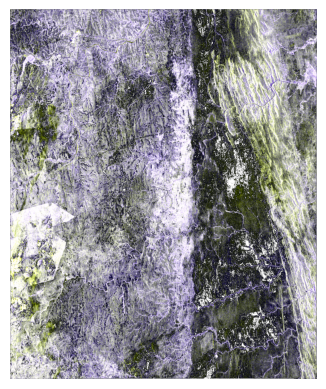

In [8]:

c2Folder = r'ALOS2214806690-180515\ALOS2214806690-180515-FBDR\C2_rlee_3x3'
# pst.utils.dxpRGB(c2Folder,type=1)
# pst.utils.dxpRGB(c2Folder,type=2)
# pst.utils.dxpRGB(c2Folder,type=3)
pst.utils.dxpRGB(c2Folder,type=4)

#### 4. Generating some polarimetric parameters from C2 matrix

##### 4.1 Barakat Degree of polarization 
##### using `polsartools.dopdp` function, [click here for documentation](https://polsartools.readthedocs.io/en/latest/files/functions/dual_pol/DOP_dp.html) or run `print(polsartools.dopdp.__.doc__)`


In [9]:

pst.dopdp(c2Folder)


Progress : 100%|███████████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 12.69 block/s]


Saved file ALOS2214806690-180515\ALOS2214806690-180515-FBDR\C2_rlee_3x3\dopdp.tif
Execution time for dopdp: 3.00 seconds


##### Preview the output

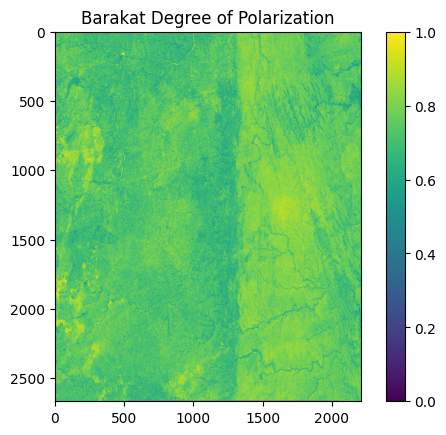

In [10]:


data = pst.utils.read_bin(c2Folder+'/dopdp.tif')
fig,ax = plt.subplots()
plt.imshow(data,vmin=0,vmax=1)
ax.set_title('Barakat Degree of Polarization')
plt.colorbar()



##### 4.2. Entropy-Alpha (H/α) parameters 
##### using **`polsartools.halphadp`** function, [click here for documentation](https://polsartools.readthedocs.io/en/latest/files/functions/dual_pol/halphadxp.html) or run `print(polsartools.halphadp.__.doc__)`


In [11]:
pst.halphadp(c2Folder)


Progress : 100%|███████████████████████████████████████████████████████████████████| 30/30 [00:04<00:00,  6.39 block/s]


Saved file ALOS2214806690-180515\ALOS2214806690-180515-FBDR\C2_rlee_3x3\Hdp.tif
Saved file ALOS2214806690-180515\ALOS2214806690-180515-FBDR\C2_rlee_3x3\alphadp.tif
Execution time for halphadp: 6.00 seconds


##### Preview the output

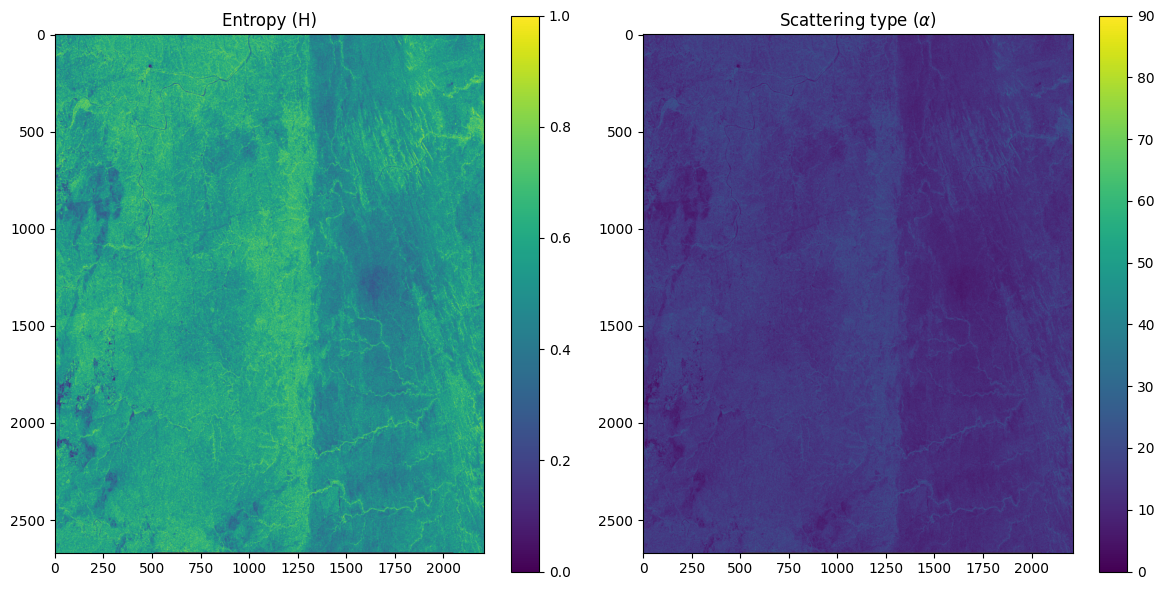

In [12]:

data1 = pst.utils.read_bin(c2Folder + '/Hdp.tif')
data2 = pst.utils.read_bin(c2Folder + '/alphadp.tif')
# fig, ax = plt.subplots(ncols=2)
fig, ax = plt.subplots(ncols=2, figsize=(12, 6))

ax[0].imshow(data1, vmin=0, vmax=1)
ax[0].set_title("Entropy (H)")
fig.colorbar(ax[0].imshow(data1, vmin=0, vmax=1), ax=ax[0])

ax[1].imshow(data2, vmin=0, vmax=90)
ax[1].set_title(r"Scattering type ($\alpha$)")
fig.colorbar(ax[1].imshow(data2, vmin=0, vmax=90), ax=ax[1])

plt.tight_layout()

##### Plot Entropy-Alpha plot for dual-pol
##### using **`polsartools.halpha_plot_dp`** function, [click here for documentation](https://polsartools.readthedocs.io/en/latest/files/functions/dual_pol/halpha_plot_dp.html) or run `print(polsartools.halpha_plot_dp.__.doc__)`

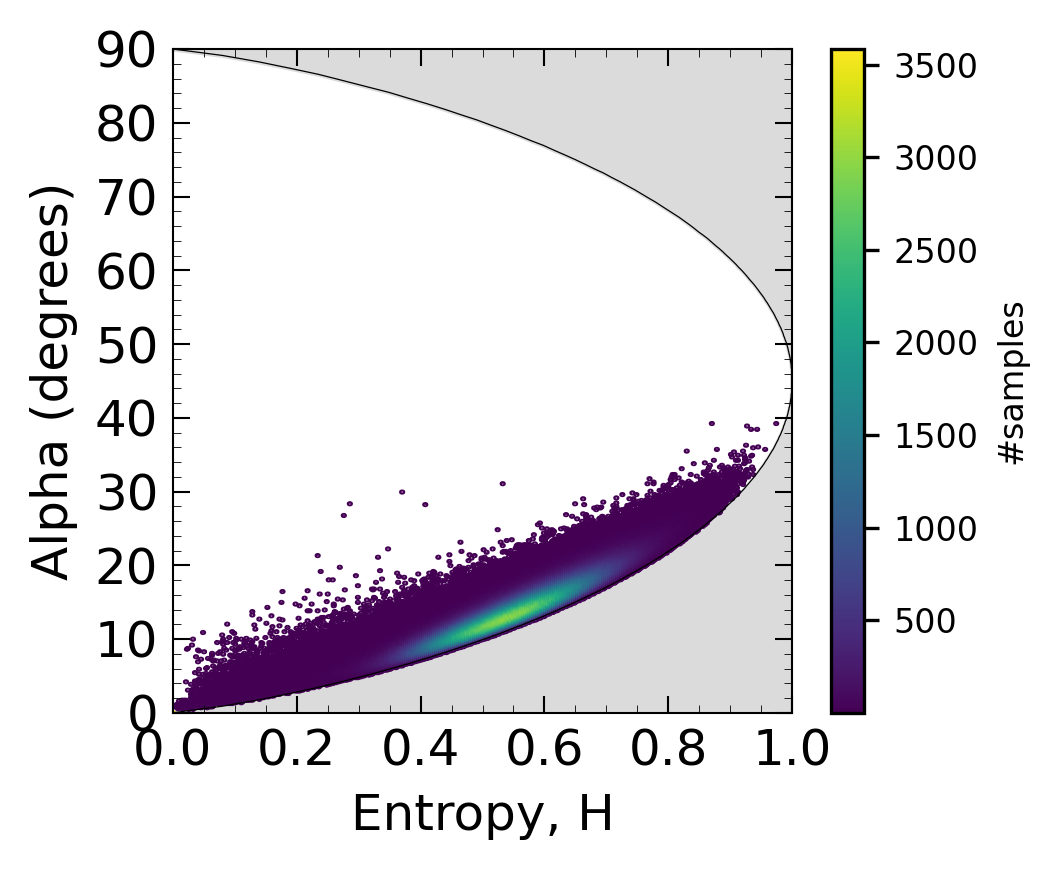

In [13]:
h = pst.utils.read_bin(c2Folder + '/Hdp.tif')
alpha = pst.utils.read_bin(c2Folder + '/alphadp.tif')

pst.halpha_plot_dp(h,alpha)

##### 4.3. Shannon Entropy parameters (SE is the sum of contributions from intensity (SEI) and polarimetry (SEP))
##### using **`polsartools.shannon_h_dp`** function, [click here for documentation](https://polsartools.readthedocs.io/en/latest/files/functions/dual_pol/shannon_h_dp.html) or run `print(polsartools.shannon_h_dp.__.doc__)`

In [14]:
pst.shannon_h_dp(c2Folder,window_size = 3)

Progress : 100%|███████████████████████████████████████████████████████████████████| 30/30 [00:05<00:00,  5.98 block/s]


Saved file ALOS2214806690-180515\ALOS2214806690-180515-FBDR\C2_rlee_3x3\H_Shannon.tif
Saved file ALOS2214806690-180515\ALOS2214806690-180515-FBDR\C2_rlee_3x3\HI_Shannon.tif
Saved file ALOS2214806690-180515\ALOS2214806690-180515-FBDR\C2_rlee_3x3\HP_Shannon.tif
Execution time for shannon_h_dp: 6.00 seconds


##### Preview the output

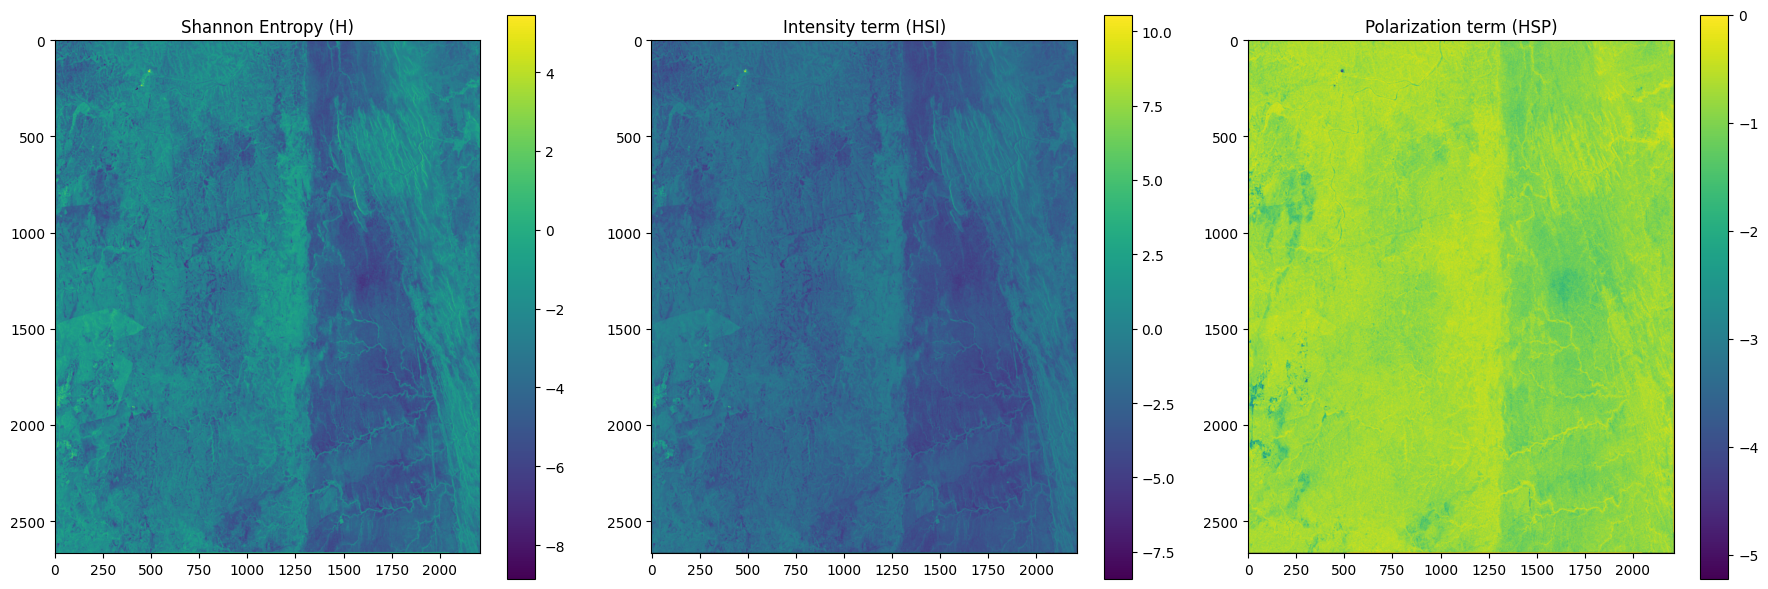

In [15]:
data1 = pst.utils.read_bin(c2Folder + '/H_Shannon.tif')
data2 = pst.utils.read_bin(c2Folder + '/HI_Shannon.tif')
data3 = pst.utils.read_bin(c2Folder + '/HP_Shannon.tif')

fig, ax = plt.subplots(ncols=3, figsize=(18, 6))

ax[0].imshow(data1)
ax[0].set_title("Shannon Entropy (H)")
fig.colorbar(ax[0].imshow(data1), ax=ax[0])

ax[1].imshow(data2)
ax[1].set_title(r"Intensity term (HSI)")
fig.colorbar(ax[1].imshow(data2), ax=ax[1])

ax[2].imshow(data3)
ax[2].set_title(r"Polarization term (HSP)")
fig.colorbar(ax[2].imshow(data3), ax=ax[2])

plt.tight_layout()

##### 4.4. vegetation indices, Radar vegetation index (RVI), Dual-pol Radar Vegetation Index (DpRVI)

##### using **`polsartools.rvidp`** function, [click here for documentation](https://polsartools.readthedocs.io/en/latest/files/functions/dual_pol/RVI_dp.html) or run `print(polsartools.rvidp.__.doc__)`

##### using **`polsartools.dprvi`** function, [click here for documentation](https://polsartools.readthedocs.io/en/latest/files/functions/dual_pol/RVI_dp.html) or run `print(polsartools.dprvi.__.doc__)`




In [16]:

pst.rvidp(c2Folder)

pst.dprvi(c2Folder)


Progress : 100%|███████████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 13.11 block/s]


Saved file ALOS2214806690-180515\ALOS2214806690-180515-FBDR\C2_rlee_3x3\rvidp.tif
Execution time for rvidp: 3.00 seconds


Progress : 100%|███████████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 11.88 block/s]


Saved file ALOS2214806690-180515\ALOS2214806690-180515-FBDR\C2_rlee_3x3\dprvi.tif
Execution time for dprvi: 3.00 seconds


##### Preview the output

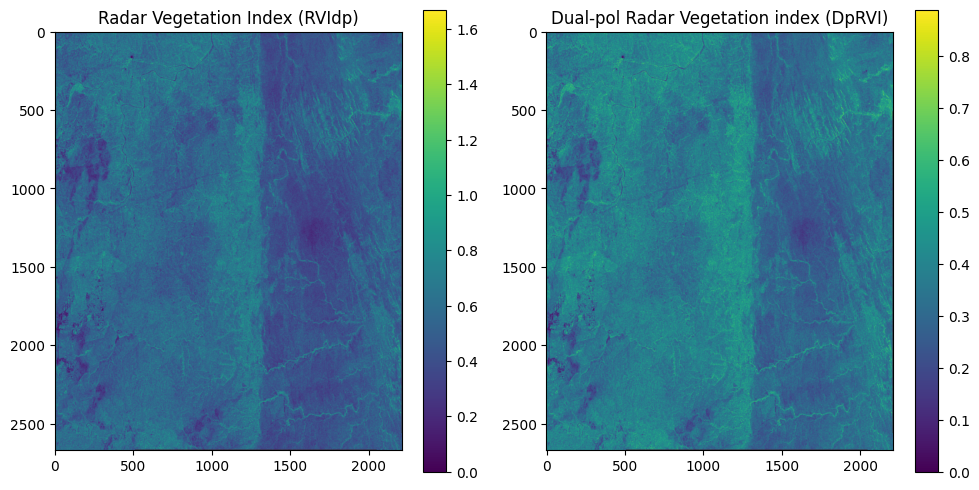

In [17]:

data1 = pst.utils.read_bin(c2Folder + '/rvidp.tif')
data2 = pst.utils.read_bin(c2Folder + '/dprvi.tif')

fig, ax = plt.subplots(ncols=2, figsize=(10, 5))

ax[0].imshow(data1, vmin=0, vmax=np.nanmax(data1))
ax[0].set_title("Radar Vegetation Index (RVIdp)")
fig.colorbar(ax[0].imshow(data1, vmin=0, vmax=np.nanmax(data1)), ax=ax[0])

ax[1].imshow(data2, vmin=0, vmax=np.nanmax(data2))
ax[1].set_title(r'Dual-pol Radar Vegetation index (DpRVI)')
fig.colorbar(ax[1].imshow(data2, vmin=0, vmax=np.nanmax(data2)), ax=ax[1])

plt.tight_layout()